## Logistic Regression Model

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [34]:
data = pd.read_csv("./dataset/train.csv")  ## path
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [35]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [36]:
data.shape 

(159571, 8)

In [37]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [38]:
print(data["comment_text"].isna().sum())

0


In [39]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
unlabelled_in_all = data[(data['toxic']!=1) & (data['severe_toxic']!=1) &
                             (data['obscene']!=1) & (data['threat']!=1) &
                             (data['insult']!=1) & (data['identity_hate']!=1)]
print('Percentage of unlabelled comments or good comments is ', len(unlabelled_in_all)/len(data)*100)

Percentage of unlabelled comments or good comments is  89.83211235124176


In [41]:
labelled_in_all = data[(data['toxic']==1) & (data['severe_toxic']==1) &
                             (data['obscene']==1) & (data['threat']==1) &
                             (data['insult']==1) & (data['identity_hate']==1)]
print('Percentage of comments which is present in all categories is ', len(labelled_in_all)/len(data)*100)

Percentage of comments which is present in all categories is  0.019427088882065038


In [42]:
print('Total rows in train is {}'.format(len(data)))
print(data[cols_target].sum())

Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


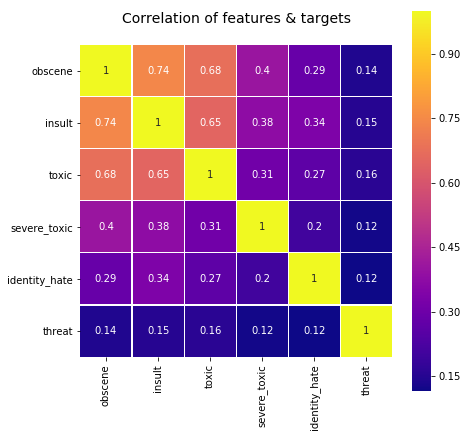

In [43]:
target_data = data[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(target_data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

plt.show()

In [44]:
data['block'] =data[cols_target].sum(axis =1)
print(data['block'].value_counts())
data['block'] = data['block'] > 0 
data['block'] = data['block'].astype(int)
print(data['block'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: block, dtype: int64
0    143346
1     16225
Name: block, dtype: int64


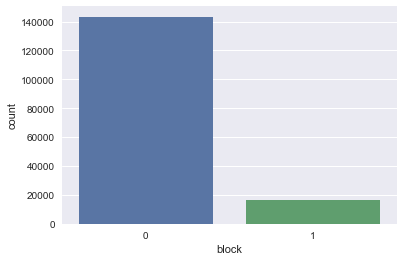

In [45]:
sns.set()
sns.countplot(x="block" , data = data )
plt.show()

In [46]:
data['char_length'] = data['comment_text'].apply(lambda x: len(str(x)))

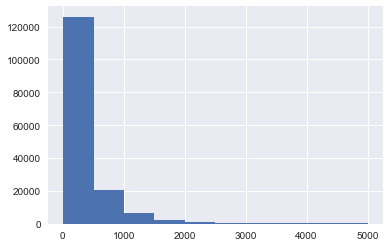

In [47]:
sns.set()
data['char_length'].hist()
plt.show()

## Text Cleaning

In [48]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [49]:
%%time 

data['comment_text'] = data['comment_text'].map(lambda com : clean_text(com))


Wall time: 26.5 s


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['comment_text'], data['block'], test_size=0.2, random_state=42)

In [51]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(127656,) (31915,)
(127656,) (31915,)


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 10000, stop_words='english')
#vect = TfidfVectorizer(stop_words='english')
print(vect)
pickle.dump(vect, open("vectorizer.pickle", "wb"))

TfidfVectorizer(max_features=10000, stop_words='english')


In [53]:
vect = pickle.load(open("vectorizer.pickle", 'rb'))

In [66]:
%%time 

X_train_dtm = vect.fit_transform(X_train)

X_train_dtm

Wall time: 17 s


In [67]:
pickle.dump(vect, open("vectorizer.pickle", "wb"))

In [69]:
vect = pickle.load(open("vectorizer.pickle", 'rb'))

In [70]:
X_train_dtm.shape

(127656, 10000)

In [71]:
%%time
X_test_dtm = vect.transform(X_test)

X_test_dtm

Wall time: 4.03 s


In [72]:
X_test_dtm.shape

(31915, 10000)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=1, max_iter = 2000)
import pickle



# train the model using X_train_dtm & y_train
logreg.fit(X_train_dtm, y_train)
filename = "lr_model.pkl"
pickle.dump(logreg, open(filename, 'wb'))
# compute the training accuracy
y_pred_train = logreg.predict(X_train_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
# compute the predicted probabilities for X_test_dtm
y_pred_test = logreg.predict(X_test_dtm)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))

Training accuracy is 0.9594613649182178
Test accuracy is 0.9563214789284036
[[28507   164]
 [ 1230  2014]]


In [59]:
#!pwd
#cd /content/drive/MyDrive/projects/textclassification

## Testing model for custom inputs

In [60]:
import pickle
model = pickle.load(open("lr_model.pkl", 'rb'))

In [61]:
vect = pickle.load(open("vectorizer.pickle", 'rb'))
sen = [" FCUK"]

In [63]:
print(sen)
print(sen_trans)

[' FCUK']
  (0, 9687)	1.0


In [8]:
p = model.predict(sen_trans)

In [9]:
print(p)

[0]


In [75]:
sen = ["COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK"]
sen_trans = vect.transform(sen)
p = model.predict(sen_trans)[0]
validity = ["allowed","toxic"]
print(validity[p])


toxic


In [76]:
import pandas as pd


In [77]:
file = pd.read_csv("./dataset/bad-words.csv")

In [79]:
#file

In [80]:
badwords = file["jigaboo"].values.tolist()

In [88]:
badwords.extend([
'2g1c',
'2 girls 1 cup',
'acrotomophilia',
'anal',
'anilingus',
'anus',
'arsehole',
'ass',
'asshole',
'assmunch',
'auto erotic',
'autoerotic',
'babeland',
'baby batter',
'ball gag',
'ball gravy',
'ball kicking',
'ball licking',
'ball sack',
'ball sucking',
'bangbros',
'bareback',
'barely legal',
'barenaked',
'bastardo',
'bastinado',
'bbw',
'bdsm',
'beaver cleaver',
'beaver lips',
'bestiality',
'bi curious',
'big black',
'big breasts',
'big knockers',
'big tits',
'bimbos',
'birdlock',
'bitch',
'black cock',
'blonde action',
'blonde on blonde action',
'blow j',
'blow your l',
'blue waffle',
'blumpkin',
'bollocks',
'bondage',
'boner',
'boob',
'boobs',
'booty call',
'brown showers',
'brunette action',
'bukkake',
'bulldyke',
'bullet vibe',
'bung hole',
'bunghole',
'busty',
'butt',
'buttcheeks',
'butthole',
'camel toe',
'camgirl',
'camslut',
'camwhore',
'carpet muncher',
'carpetmuncher',
'chocolate rosebuds',
'circlejerk',
'cleveland steamer',
'clit',
'clitoris',
'clover clamps',
'clusterfuck',
'cock',
'cocks',
'coprolagnia',
'coprophilia',
'cornhole',
'cum',
'cumming',
'cunnilingus',
'cunt',
'darkie',
'date rape',
'daterape',
'deep throat',
'deepthroat',
'dick',
'dildo',
'dirty pillows',
'dirty sanchez',
'dog style',
'doggie style',
'doggiestyle',
'doggy style',
'doggystyle',
'dolcett',
'domination',
'dominatrix',
'dommes',
'donkey punch',
'double dong',
'double penetration',
'dp action',
'eat my ass',
'ecchi',
'ejaculation',
'erotic',
'erotism',
'escort',
'ethical slut',
'eunuch',
'faggot',
'fecal',
'felch',
'fellatio',
'feltch',
'female squirting',
'femdom',
'figging',
'fingering',
'fisting',
'foot fetish',
'footjob',
'frotting',
'fuck',
'fucking',
'fuck buttons',
'fudge packer',
'fudgepacker',
'futanari',
'g-spot',
'gang bang',
'gay sex',
'genitals',
'giant cock',
'girl on',
'girl on top',
'girls gone wild',
'goatcx',
'goatse',
'gokkun',
'golden shower',
'goo girl',
'goodpoop',
'goregasm',
'grope',
'group sex',
'guro',
'hand job',
'handjob',
'hard core',
'hardcore',
'hentai',
'homoerotic',
'honkey',
'hooker',
'hot chick',
'how to kill',
'how to murder',
'huge fat',
'humping',
'incest',
'intercourse',
'jack off',
'jail bait',
'jailbait',
'jerk off',
'jigaboo',
'jiggaboo',
'jiggerboo',
'jizz',
'juggs',
'kike',
'kinbaku',
'kinkster',
'kinky',
'knobbing',
'leather restraint',
'leather straight jacket',
'lemon party',
'lolita',
'lovemaking',
'make me come',
'male squirting',
'masturbate',
'menage a trois',
'milf',
'missionary position',
'motherfucker',
'mound of venus',
'mr hands',
'muff diver',
'muffdiving',
'nambla',
'nawashi',
'negro',
'neonazi',
'nig nog',
'nigga',
'nigger',
'nimphomania',
'nipple',
'nipples',
'nsfw images',
'nude',
'nudity',
'nympho',
'nymphomania',
'octopussy',
'omorashi',
'one cup two girls',
'one guy one jar',
'orgasm',
'orgy',
'paedophile',
'panties',
'panty',
'pedobear',
'pedophile',
'pegging',
'penis',
'phone sex',
'piece of shit',
'piss pig',
'pissing',
'pisspig',
'playboy',
'pleasure chest',
'pole smoker',
'ponyplay',
'poof',
'poop chute',
'poopchute',
'porn',
'porno',
'pornography',
'prince albert piercing',
'pthc',
'pubes',
'pussy',
'queaf',
'raghead',
'raging boner',
'rape',
'raping',
'rapist',
'rectum',
'reverse cowgirl',
'rimjob',
'rimming',
'rosy palm',
'rosy palm and her 5 sisters',
'rusty trombone',
's&m',
'sadism',
'scat',
'schlong',
'scissoring',
'semen',
'sex',
'sexo',
'sexy',
'shaved beaver',
'shaved pussy',
'shemale',
'shibari',
'shit',
'shota',
'shrimping',
'slanteye',
'slut',
'smut',
'snatch',
'snowballing',
'sodomize',
'sodomy',
'spic',
'spooge',
'spread legs',
'strap on',
'strapon',
'strappado',
'strip club',
'style doggy',
'suck',
'sucks',
'suicide girls',
'sultry women',
'swastika',
'swinger',
'tainted love',
'taste my',
'tea bagging',
'threesome',
'throating',
'tied up',
'tight white',
'tit',
'tits',
'titties',
'titty',
'tongue in a',
'topless',
'tosser',
'towelhead',
'tranny',
'tribadism',
'tub girl',
'tubgirl',
'tushy',
'twat',
'twink',
'twinkie',
'two girls one cup',
'undressing',
'upskirt',
'urethra play',
'urophilia',
'vagina',
'venus mound',
'vibrator',
'violet blue',
'violet wand',
'vorarephilia',
'voyeur',
'vulva',
'wank',
'wet dream',
'wetback',
'white power',
'women rapping',
'wrapping men',
'wrinkled starfish',
'xx',
'xxx',
'yaoi',
'yellow showers',
'yiffy',
'zoophilia'])

In [81]:
import pickle

In [89]:
badwordset = set(badwords)

In [90]:
pickle.dump(badwordset,open("bwset.pkl","wb"))

In [91]:
bwset = pickle.load(open("bwset.pkl","rb"))

In [95]:
def ifbadword(string):#return true if string contains any bad word
    for i in string.split():
        if i in bwset:
            return True
    return False

In [100]:
y = ifbadword("deep")

In [101]:
y

False

## Final 

In [102]:
finalmodel = pickle.load(open("lr_model.pkl", 'rb'))

In [103]:
finalvect = pickle.load(open("vectorizer.pickle","rb"))

In [105]:
finalbwset = pickle.load(open("bwset.pkl","rb"))

In [133]:
def is_normal(string):
    test = [string]
    sen_trans = vect.transform(test)
    p = model.predict(sen_trans)[0]    # 0 for normal and 1 for toxic
    if p==1:
        return False
    for i in string.split():
        if i in finalbwset:
            return False
    return True
    
    

In [153]:
l = " ".join(["i am sakib" for i in range(5000)])

In [154]:
["Toxic","Normal"][is_normal(l)]

'Normal'